In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
plt.rcParams["figure.figsize"] = (10, 5)

ipl = pd.read_csv(r'IPLMatchResults2020.csv')
fantasy = pd.read_csv(r'Fantasy_points_Dream11.csv')
daily = pd.read_csv(r'Daily_matchdata.csv')

daily.columns = daily.columns.str.strip()


In [3]:
ipl.head(3)

,Match No,TEAMS,TOSS,CHOOSE_TO,GROUND,First_half_score,Second_half_score,RESULT (won_by),Super_over,MOM
0,1,CSK vs MI,CSK,BOWL,Sheikh Zayed,162/9,166/5,CSK,0,Ambati Rayudu
1,2,DC vs KXIP,KXIP,BOWL,Dubai,157/8,157/8,DC,1,Marcus Stoinis
2,3,RCB vs SRH,SRH,BOWL,Dubai,163/5,153/10,RCB,0,Y Chahal


In [4]:
ipl['RESULT (won_by)'].value_counts()

RESULT (won_by)
MI      11
DC       9
SRH      8
RCB      7
KKR      7
CSK      6
RR       6
KXIP     6
Name: count, dtype: int64

1. Which team won the most matches?

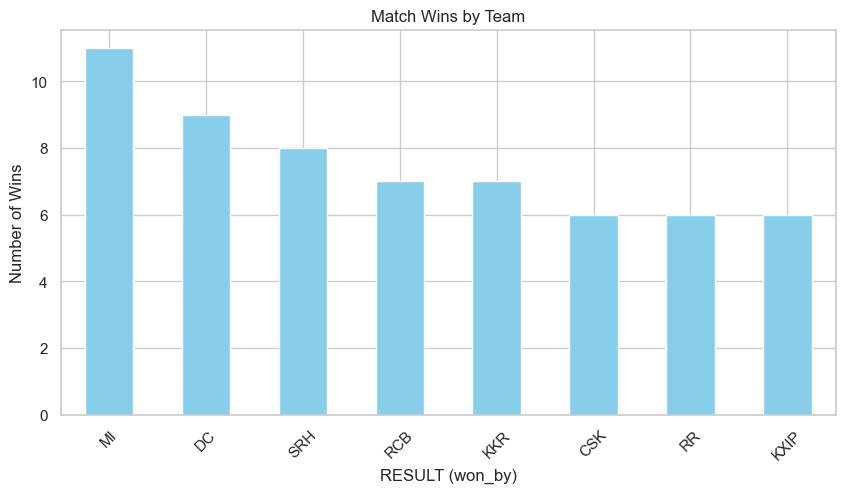

In [2]:
ipl['RESULT (won_by)'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Match Wins by Team")
plt.ylabel("Number of Wins")
plt.xticks(rotation=45)
plt.show()


2. Toss decision impact on result

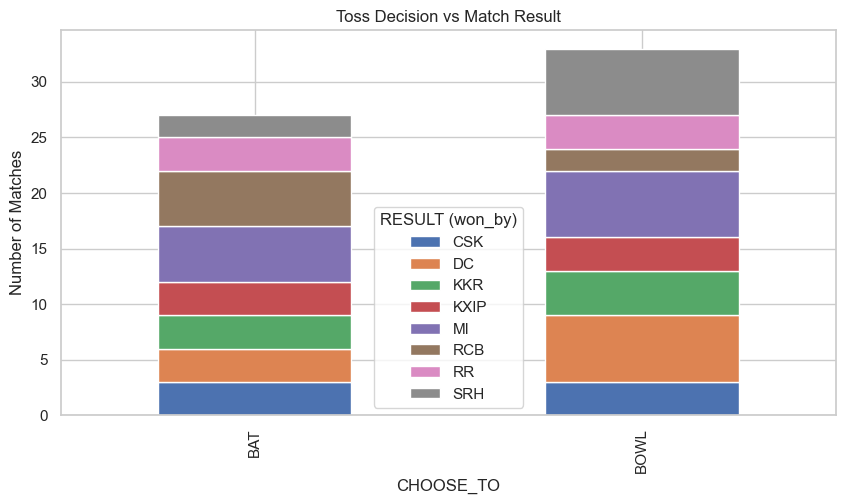

In [3]:
pd.crosstab(ipl['CHOOSE_TO'], ipl['RESULT (won_by)']).plot(kind='bar', stacked=True)
plt.title("Toss Decision vs Match Result")
plt.ylabel("Number of Matches")
plt.show()


3. Average 1st innings score per ground

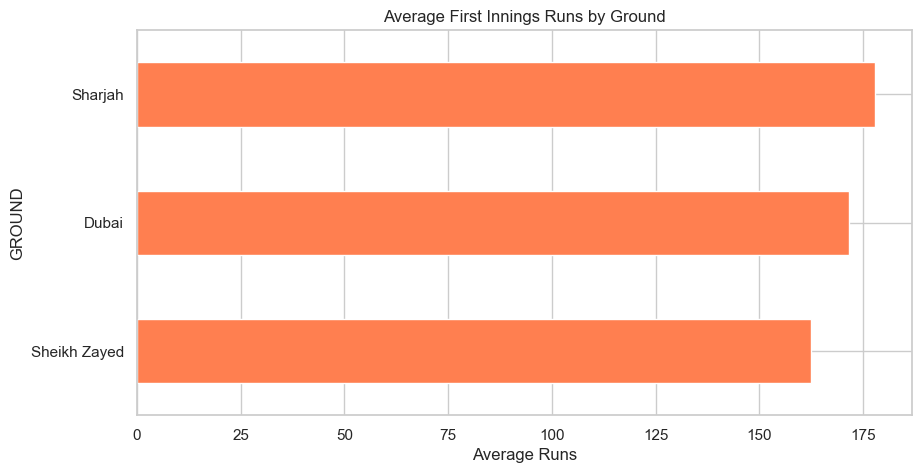

In [4]:
ipl['First_half_runs'] = ipl['First_half_score'].str.extract(r'(\d+)').astype(float)
ipl.groupby('GROUND')['First_half_runs'].mean().sort_values().plot(kind='barh', color='coral')
plt.title("Average First Innings Runs by Ground")
plt.xlabel("Average Runs")
plt.show()


4. Top 5 players by total Dream11 points

C:\Users\hv995\AppData\Local\Temp\ipykernel_13256\914141978.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  fantasy[match_cols] = fantasy[match_cols].applymap(lambda x: str(x).strip().replace("DNP", "0").replace("DNB", "0"))
C:\Users\hv995\AppData\Local\Temp\ipykernel_13256\914141978.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_players, x="Total_Points", y="Player", palette="viridis")


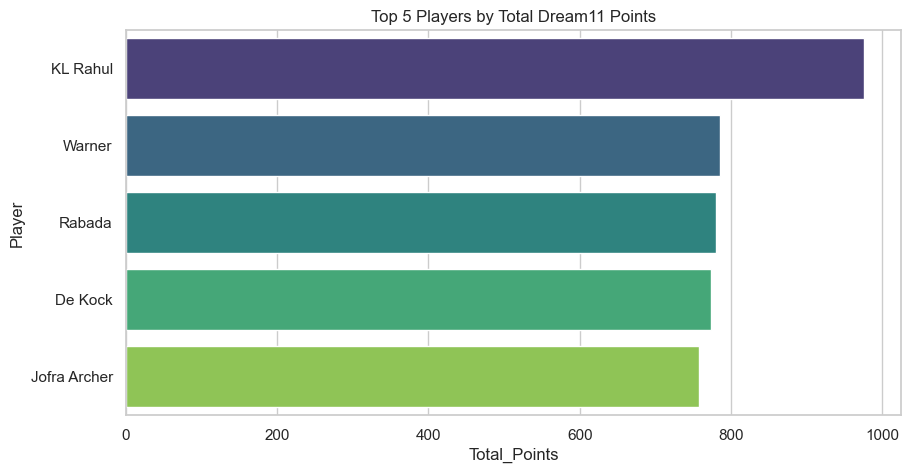

In [5]:
# Clean and convert
match_cols = [c for c in fantasy.columns if c.startswith("Match_")]
fantasy[match_cols] = fantasy[match_cols].applymap(lambda x: str(x).strip().replace("DNP", "0").replace("DNB", "0"))
fantasy[match_cols] = fantasy[match_cols].astype(float)
fantasy["Total_Points"] = fantasy[match_cols].sum(axis=1)

# Top players
top_players = fantasy.sort_values("Total_Points", ascending=False).head(5)
sns.barplot(data=top_players, x="Total_Points", y="Player", palette="viridis")
plt.title("Top 5 Players by Total Dream11 Points")
plt.show()


5. Correlation between Age and Performance

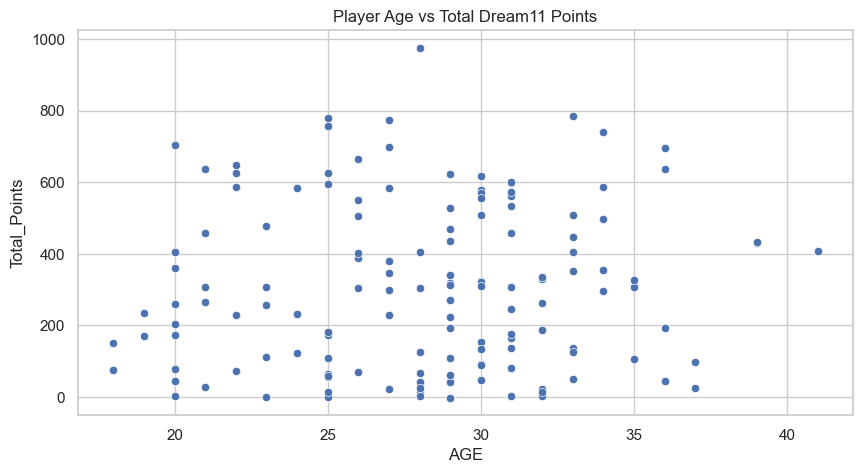

,AGE,Total_Points
AGE,1.000000,0.068167
Total_Points,0.068167,1.000000


In [6]:
sns.scatterplot(data=fantasy, x="AGE", y="Total_Points")
plt.title("Player Age vs Total Dream11 Points")
plt.show()

# Correlation
fantasy[['AGE', 'Total_Points']].corr()


6. Average points by Role

C:\Users\hv995\AppData\Local\Temp\ipykernel_13256\2288858131.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=fantasy, x="Role", y="Total_Points", estimator='mean', ci=None, palette="pastel")
C:\Users\hv995\AppData\Local\Temp\ipykernel_13256\2288858131.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fantasy, x="Role", y="Total_Points", estimator='mean', ci=None, palette="pastel")


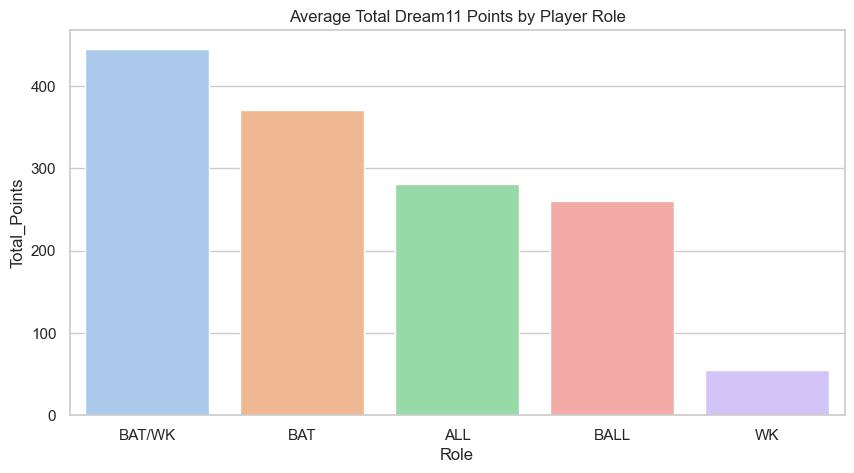

In [7]:
sns.barplot(data=fantasy, x="Role", y="Total_Points", estimator='mean', ci=None, palette="pastel")
plt.title("Average Total Dream11 Points by Player Role")
plt.show()


7. Runs distribution: Chasing vs Defending

C:\Users\hv995\AppData\Local\Temp\ipykernel_13256\2381625749.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=daily, x="Match_Type", y="Runs", palette="Set2")


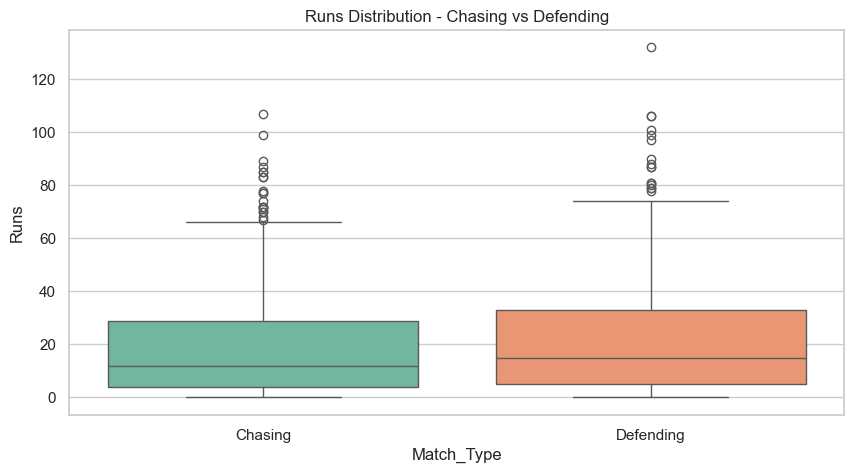

In [ ]:
daily["Runs"] = pd.to_numeric(daily["Runs"], errors="coerce")
sns.boxplot(data=daily, x="Match_Type", y="Runs", palette="Set2")
plt.title("Runs Distribution - Chasing vs Defending")
plt.show()


8. Top 10 Individual Performances

C:\Users\hv995\AppData\Local\Temp\ipykernel_13256\1790592341.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_performances, x="Dream11_ Points", y="Player", palette="coolwarm")


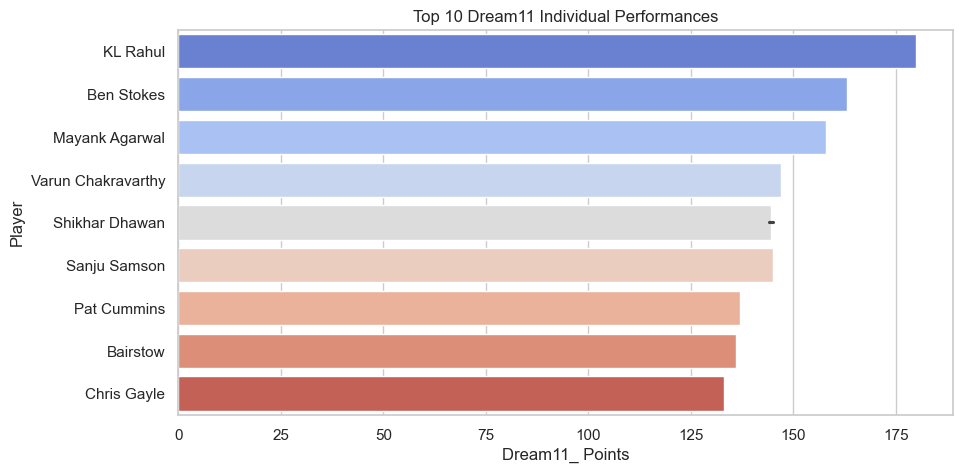

In [9]:
daily["Dream11_ Points"] = pd.to_numeric(daily["Dream11_ Points"], errors="coerce")
top_performances = daily.sort_values("Dream11_ Points", ascending=False).head(10)

sns.barplot(data=top_performances, x="Dream11_ Points", y="Player", palette="coolwarm")
plt.title("Top 10 Dream11 Individual Performances")
plt.show()


9. RH vs LH Average Dream11 Points

C:\Users\hv995\AppData\Local\Temp\ipykernel_13256\1567776061.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=daily, x="RH/LH", y="Dream11_ Points", estimator='mean', ci=None, palette="muted")
C:\Users\hv995\AppData\Local\Temp\ipykernel_13256\1567776061.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=daily, x="RH/LH", y="Dream11_ Points", estimator='mean', ci=None, palette="muted")


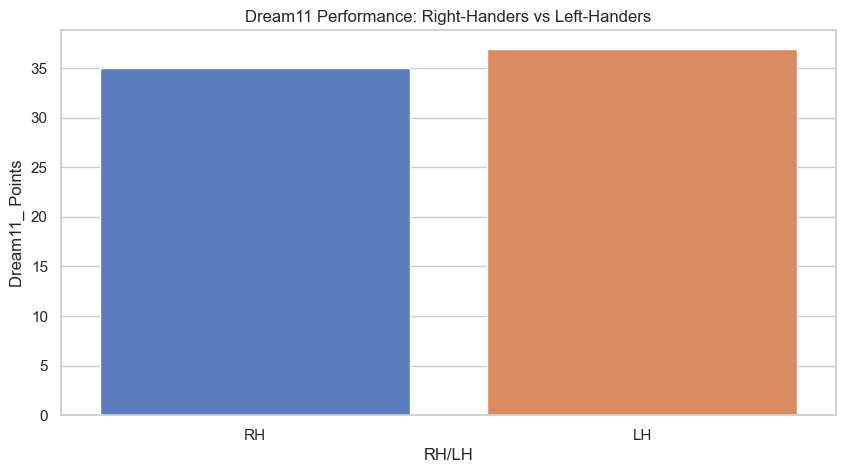

In [10]:
sns.barplot(data=daily, x="RH/LH", y="Dream11_ Points", estimator='mean', ci=None, palette="muted")
plt.title("Dream11 Performance: Right-Handers vs Left-Handers")
plt.show()


10. Dismissal Type Distribution

C:\Users\hv995\AppData\Local\Temp\ipykernel_13256\2567384638.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=daily, y="Dismissal", order=daily['Dismissal'].value_counts().index, palette="tab10")


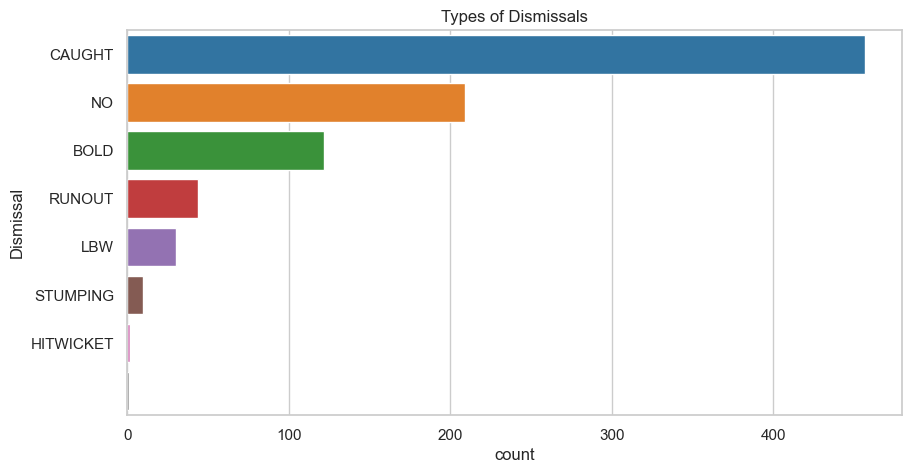

In [11]:
sns.countplot(data=daily, y="Dismissal", order=daily['Dismissal'].value_counts().index, palette="tab10")
plt.title("Types of Dismissals")
plt.show()
